In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
from scipy.sparse import csr_matrix
import scanpy as sc

sc.set_figure_params(dpi=100, color_map='viridis')  # low dpi (dots per inch) yields small inline figures
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
results_file = './write/zebrafish.h5ad'

scanpy==1.5.1 anndata==0.7.3 umap==0.4.4 numpy==1.19.0 scipy==1.5.0 pandas==1.0.5 scikit-learn==0.23.1 statsmodels==0.11.1 python-igraph==0.8.2 louvain==0.7.0 leidenalg==0.8.1


In [2]:
adata = sc.read_csv("../datasets/data.csv")

In [3]:
adata

AnnData object with n_obs × n_vars = 26586 × 6026

In [4]:
adata.write(results_file)

In [5]:
adata = sc.read(results_file)

Filter out data

In [6]:
sc.pp.recipe_zheng17(adata)

running recipe zheng17
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
normalizing counts per cell
    finished (0:00:00)
    finished (0:00:09)


In [7]:
sc.pp.neighbors(adata)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:05)


/Users/reang/anaconda3/envs/compbio/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11000. The TBB threading layer is disabled.
  warnings.warn(problem)


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:02)


In [8]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:23)


In [9]:
sc.tl.draw_graph(adata, maxiter=100)

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:01:09)


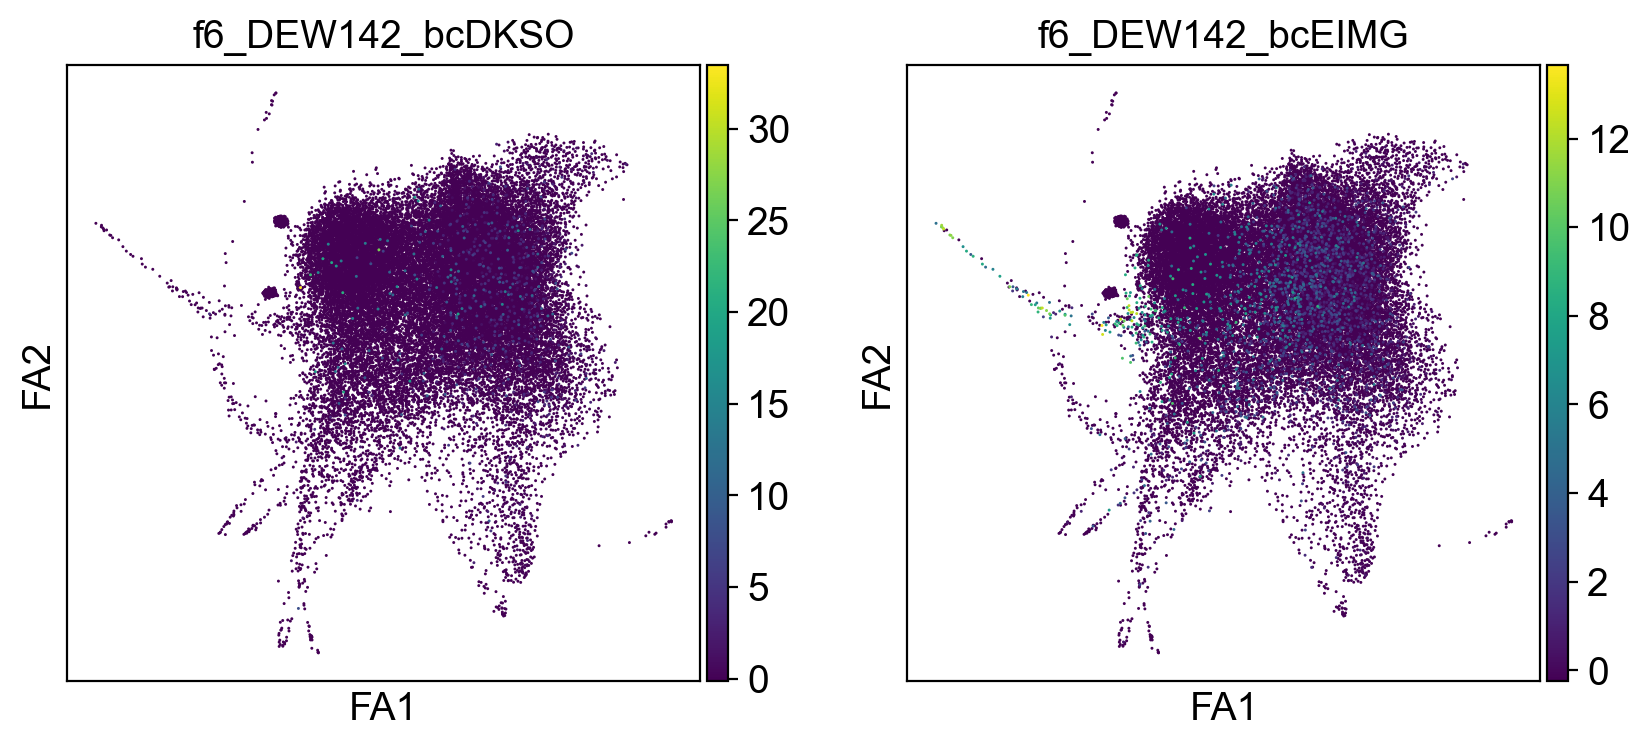

In [15]:
sc.pl.draw_graph(adata, color=['f6_DEW142_bcDKSO', 'f6_DEW142_bcEIMG'])

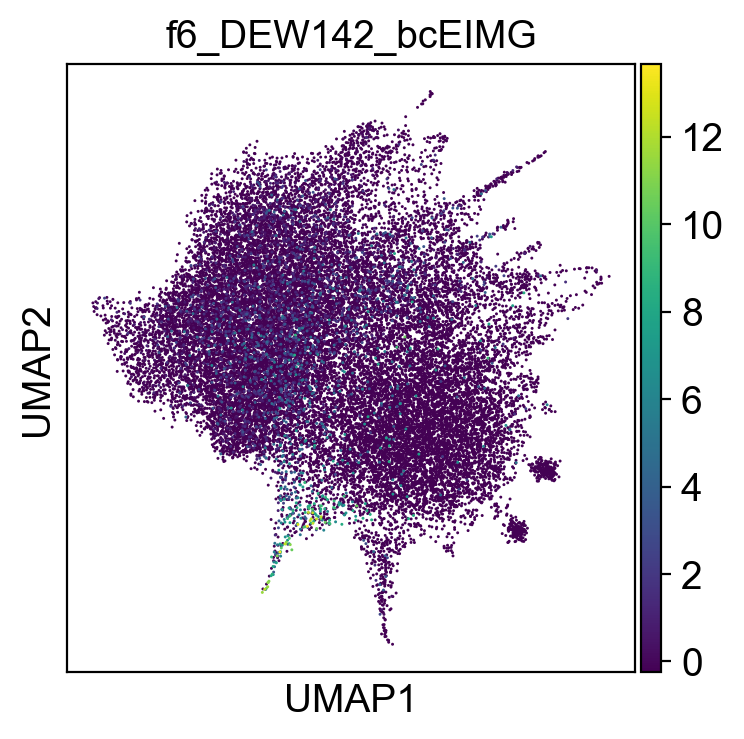

In [17]:
sc.pl.umap(adata, color='f6_DEW142_bcEIMG')

In [18]:
adata.var_names

Index(['f6_DEW142_bcDKSO', 'f6_DEW142_bcEIMG', 'f6_DEW142_bcANLP',
       'f6_DEW142_bcFQEB', 'f6_DEW142_bcDGFS', 'f6_DEW142_bcEYRK',
       'f6_DEW142_bcBAWO', 'f6_DEW142_bcARSK', 'f6_DEW142_bcEYKW',
       'f6_DEW142_bcAWOW',
       ...
       'f6_DEW148_bcFKDJ', 'f6_DEW148_bcEARZ', 'f6_DEW148_bcDBZB',
       'f6_DEW148_bcCAGA', 'f6_DEW148_bcEILD', 'f6_DEW148_bcACVH',
       'f6_DEW148_bcBIJP', 'f6_DEW148_bcELJM', 'f6_DEW148_bcDBYH',
       'f6_DEW148_bcGFQA'],
      dtype='object', length=1000)